In [5]:
import numpy as np
from matplotlib import pyplot as plt

# Visualize Results

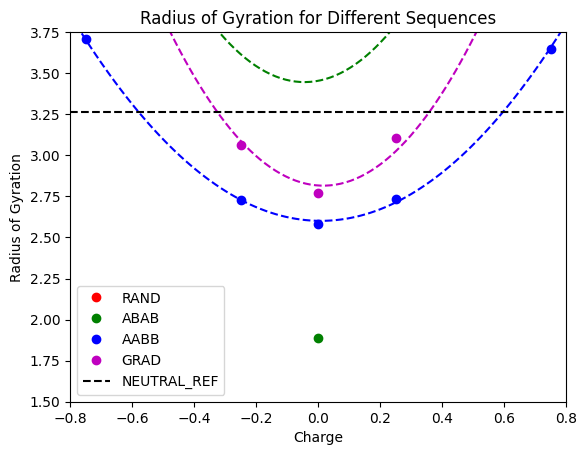

In [8]:
import numpy as np
import matplotlib.pyplot as plt

sequences = ["RAND", "ABAB", "AABB", "GRAD"]
colors = ['r', 'g', 'b', 'm']  # Different colors for different sequences
chrg = ["-75", "-25", "N", "+25", "+75"]
chrg_val = [-0.75, -0.25, 0., 0.25, 0.75]

plt.clf()

for seq_idx, sequ in enumerate(sequences):
    gyr = np.zeros(len(chrg))
    
    for i in range(len(chrg)):
        tag = 'poly_sequ_' + sequ + '_' + chrg[i] + '_nchain_1_temp_1'
        data = np.loadtxt('../data/' + tag + '/gyr.txt')
        gyr[i] = np.mean(data)
    
    p = np.polyfit(chrg_val, gyr, 2)
    x = np.linspace(-0.8, 0.8, 100)
    y = np.polyval(p, x)
    
    plt.plot(chrg_val, gyr, 'o', color=colors[seq_idx], label=sequ)
    plt.plot(x, y, '--', color=colors[seq_idx])

# Load and plot the NEUTRAL_REF data
neutral_tag = 'poly_sequ_NEUTRAL_REF_nchain_1_temp_1'
neutral_data = np.loadtxt('../data/' + neutral_tag + '/gyr.txt')
neutral_gyr = np.mean(neutral_data)

# Plot a horizontal line for the NEUTRAL_REF data
plt.axhline(neutral_gyr, color='k', linestyle='--', label='NEUTRAL_REF')


plt.xlabel('Charge')
plt.ylabel('Radius of Gyration')
plt.title('Radius of Gyration for Different Sequences')
plt.legend()
# plt.ylim(1.5,3.75)
# plt.xlim(-0.8,0.8)
plt.show()



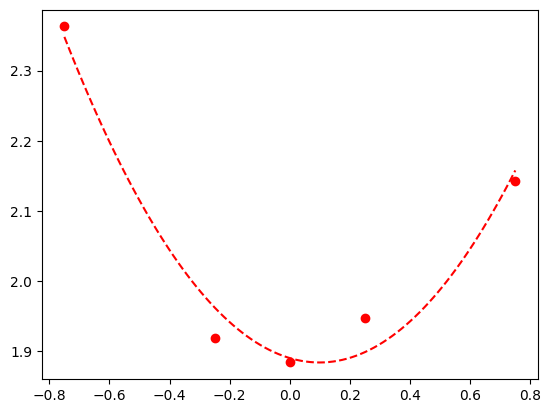

In [11]:
sequ = "ABAB"

chrg = ["-75","-25","N","+25","+75"]
chrg_val = [-0.75,-0.25,0.,0.25,0.75]

gyr = np.zeros(len(chrg))

plt.clf()

for i in range(len(chrg)):
    tag = 'poly_sequ_'+sequ+'_'+chrg[i]+'_nchain_1_temp_1'
    data = np.loadtxt('../data/'+tag+'/gyr.txt')
    gyr[i] = np.mean(data)

p = np.polyfit(chrg_val,gyr,2)

x = np.linspace(-0.75,0.75,100)
y = np.polyval(p,x)

plt.plot(chrg_val,gyr,'ro')
plt.plot(x,y,'--r')

# Radius of Gyration

In [256]:
gyr = Gyradius(ag,n_chains=1,n_monomers=40, unwrap=True)

In [257]:
gyr.run(start=1000)

100%|██████████| 2001/2001 [00:00<00:00, 6198.12it/s]


In [258]:
np.savetxt('../data/'+tag+'/gyr.txt',gyr.results.gyradii)

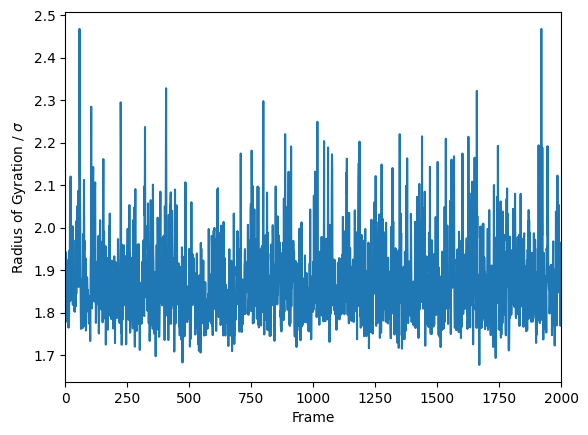

In [259]:
plt.plot(gyr.results.gyradii[0])
plt.xlabel('Frame')
plt.ylabel(f'Radius of Gyration / $\sigma$')
plt.xlim(0,2000)
plt.savefig('../data/'+tag+'/gyr.pdf')

# End-to-end Vector

In [260]:
e2e = EndToEndVector(ag,n_chains=1,n_monomers=40, unwrap=True)

/home/kfu/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/base.py:725: UserWarning: Reader has no dt information, set to 1.0 ps
  return self.ts.dt


In [261]:
e2e.run(start=1000)
e2e.save('../data/'+tag+'/e2e')

/home/kfu/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/LAMMPS.py:598: UserWarning: Reader has no dt information, set to 1.0 ps
  ts.data['time'] = step_num * ts.dt
100%|██████████| 2001/2001 [00:00<00:00, 7784.14it/s]
1it [00:00, 2155.35it/s]


In [262]:
abs_e2e = np.zeros(len(e2e._e2e))

for i in range(len(e2e._e2e)):
    abs_e2e[i] = np.linalg.norm(e2e._e2e[i])

abs_e2e

array([2.83544703, 3.10923485, 2.44098501, ..., 2.89960539, 4.50251924,
       5.81788083])

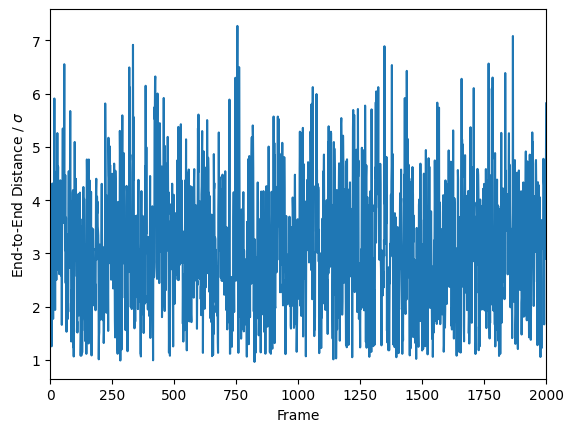

In [263]:
plt.plot(e2e.results.times,abs_e2e)
plt.xlabel('Frame')
plt.ylabel('End-to-End Distance / $\sigma$')
plt.xlim(0,2000)
plt.savefig('../data/'+tag+'/e2e.pdf')

/tmp/ipykernel_2165950/900919511.py:4: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,3000)


(0.6838305520458344, 3000)

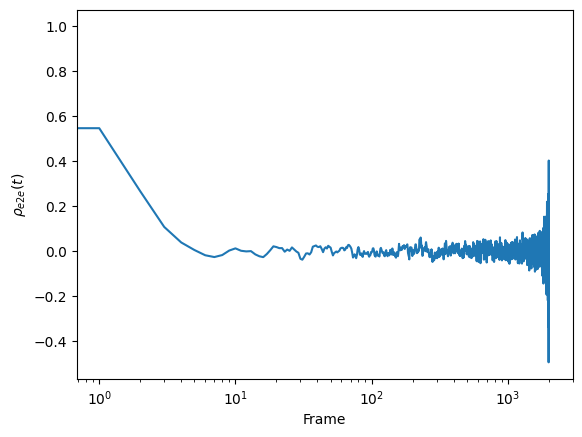

In [264]:
plt.semilogx(e2e.results.times,e2e.results.acf[0][0])
plt.xlabel('Frame')
plt.ylabel(r'$ \rho_{e2e}(t)$')   
plt.xlim(0,3000)